# Mã hóa các biến 
- Các biến ['Nhà sản xuất', 'Model','Kết nối','Loại switch'] là các biến danh mục không thứ tự nên sử dụng phương pháp onehot encoding để mã hóa cả 4 biến
- biến kích thước chỉ cần chuẩn hóa theo min max scaler


In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder


In [12]:
df = pd.read_csv("Data_Clean.csv")
df.head()

,Tên SP,Nhà sản xuất,Model,Kết nối,Kích thước,Loại switch,Cân nặng,Giá(đ)
0,Bàn Phím Cơ Gaming không dây Asus ROG Strix Sc...,Asus,EK314W,không dây,356.449591,brown,912.927326,3899000
1,Bàn phím Gaming ASUS ROG STRIX SCOPE II NX USB,Asus,KB1,vừa có dây vừa không dây,356.449591,red,912.927326,2699000
2,Bàn phím Gaming ASUS ROG AZOTH,Asus,White Switch,có dây,326.000000,red,1186.000000,6099000
3,Bàn phím Gaming Asus ROG Azoth NX SM Black,Asus,ROG Falchion,có dây,326.000000,yellow,1186.000000,5999000
4,Bàn phím Gaming ASUS ROG AZOTH NX RED,Asus,K10,có dây,326.000000,red,1186.000000,5999000


In [13]:
cols = ['Nhà sản xuất','Model','Kết nối','Loại switch']
encoded_df = pd.DataFrame()
for col in cols:
    te = TargetEncoder()
    encoded_values = te.fit_transform(df[col], df['Giá(đ)'])
    encoded_df[col] = encoded_values
  

In [14]:
df.drop(cols, axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,Tên SP,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,Bàn Phím Cơ Gaming không dây Asus ROG Strix Sc...,356.449591,912.927326,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,Bàn phím Gaming ASUS ROG STRIX SCOPE II NX USB,356.449591,912.927326,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,Bàn phím Gaming ASUS ROG AZOTH,326.000000,1186.000000,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,Bàn phím Gaming Asus ROG Azoth NX SM Black,326.000000,1186.000000,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,Bàn phím Gaming ASUS ROG AZOTH NX RED,326.000000,1186.000000,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


# Áp dụng onehot encoder cho các biến danh mục


In [4]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_transform = ohe.fit_transform(df[['Nhà sản xuất', 'Model','Kết nối','Loại switch']])


In [58]:
ohe_transform

,Nhà sản xuất_AULA,Nhà sản xuất_Akko,Nhà sản xuất_Apple,Nhà sản xuất_Asus,Nhà sản xuất_Corsair,Nhà sản xuất_DAREU,Nhà sản xuất_Darkflash,Nhà sản xuất_Darmoshark,Nhà sản xuất_Dell,Nhà sản xuất_E-Dra,...,Loại switch_black,Loại switch_blue,Loại switch_brown,Loại switch_cherry,Loại switch_green,Loại switch_pink,Loại switch_red,Loại switch_silver,Loại switch_white,Loại switch_yellow
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
ohe_transform.shape

(884, 80)

In [60]:
df= pd.concat([df,ohe_transform],axis=1).drop(columns=['Nhà sản xuất','Model','Kết nối','Loại switch'])
#df= pd.concat([df,ohe_transform],axis=1).drop(columns=['Nhà sản xuất','Model','Kết nối','Loại switch','Tên SP','Kích thước'])

In [61]:
df.head(20)

,Tên SP,Kích thước,Giá(đ),Nhà sản xuất_AULA,Nhà sản xuất_Akko,Nhà sản xuất_Apple,Nhà sản xuất_Asus,Nhà sản xuất_Corsair,Nhà sản xuất_DAREU,Nhà sản xuất_Darkflash,...,Loại switch_black,Loại switch_blue,Loại switch_brown,Loại switch_cherry,Loại switch_green,Loại switch_pink,Loại switch_red,Loại switch_silver,Loại switch_white,Loại switch_yellow
0,Bàn Phím Cơ Gaming không dây Asus ROG Strix Sc...,357.309783,3899000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Bàn phím Gaming ASUS ROG STRIX SCOPE II NX USB,357.309783,2699000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Bàn phím Gaming ASUS ROG AZOTH,326.000000,6099000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Bàn phím Gaming Asus ROG Azoth NX SM Black,326.000000,5999000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Bàn phím Gaming ASUS ROG AZOTH NX RED,326.000000,5999000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Bàn phím cơ Asus ROG Falchion Blue switch 90MP...,305.000000,1599000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Bàn phím Gaming Asus ROG Strix Scope II NX SM,436.000000,3199000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,Bàn phím game Asus TUF K1,357.309783,849000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Kit bàn phím cơ FLEsport Q75 Crystal Grey,357.309783,1249000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Bàn phím Lecoo KB101 đen,357.309783,129000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df.drop(columns=['Tên SP'], inplace=True)
df

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,356.449591,912.927326,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,356.449591,912.927326,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,326.000000,1186.000000,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,326.000000,1186.000000,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,326.000000,1186.000000,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06
...,...,...,...,...,...,...,...
1363,358.075472,1013.009804,2999000,2.297542e+06,2.277176e+06,1.763228e+06,1.868848e+06
1364,358.075472,1013.009804,2999000,2.297542e+06,1.743901e+06,1.906612e+06,1.815694e+06
1365,358.075472,1013.009804,649000,8.946338e+05,1.272499e+06,1.763228e+06,1.815694e+06
1366,358.075472,1013.009804,4589000,6.828467e+05,1.628192e+06,1.770855e+06,1.825662e+06


In [16]:
def encode_price(price):
    if price < 2000000:
        return 1
    else:
        return 2

df['Giá(đ)'] = df['Giá(đ)'].apply(encode_price)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11164\2670410233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


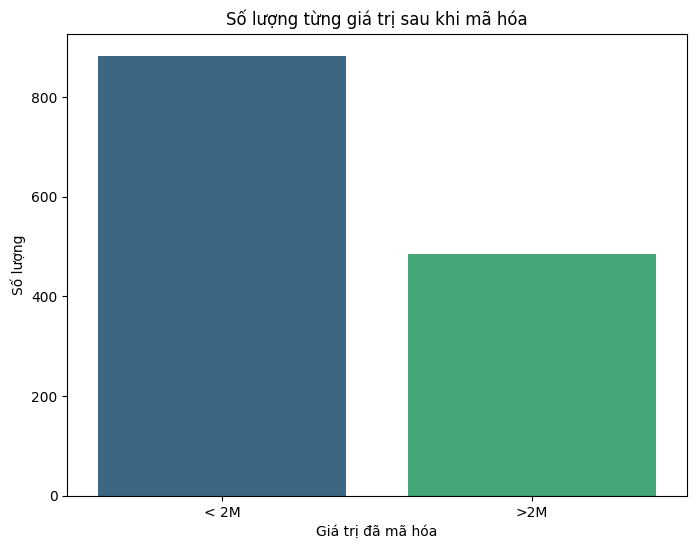

In [18]:

value_counts = df['Giá(đ)'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
plt.title('Số lượng từng giá trị sau khi mã hóa')
plt.xlabel('Giá trị đã mã hóa')
plt.ylabel('Số lượng')
plt.xticks([0, 1], ['< 2M','>2M'])  # Tùy chọn: đặt nhãn cho các giá trị mã hóa
plt.show()

# Áp dụng minmax scaler cho biến 'Kích thước'

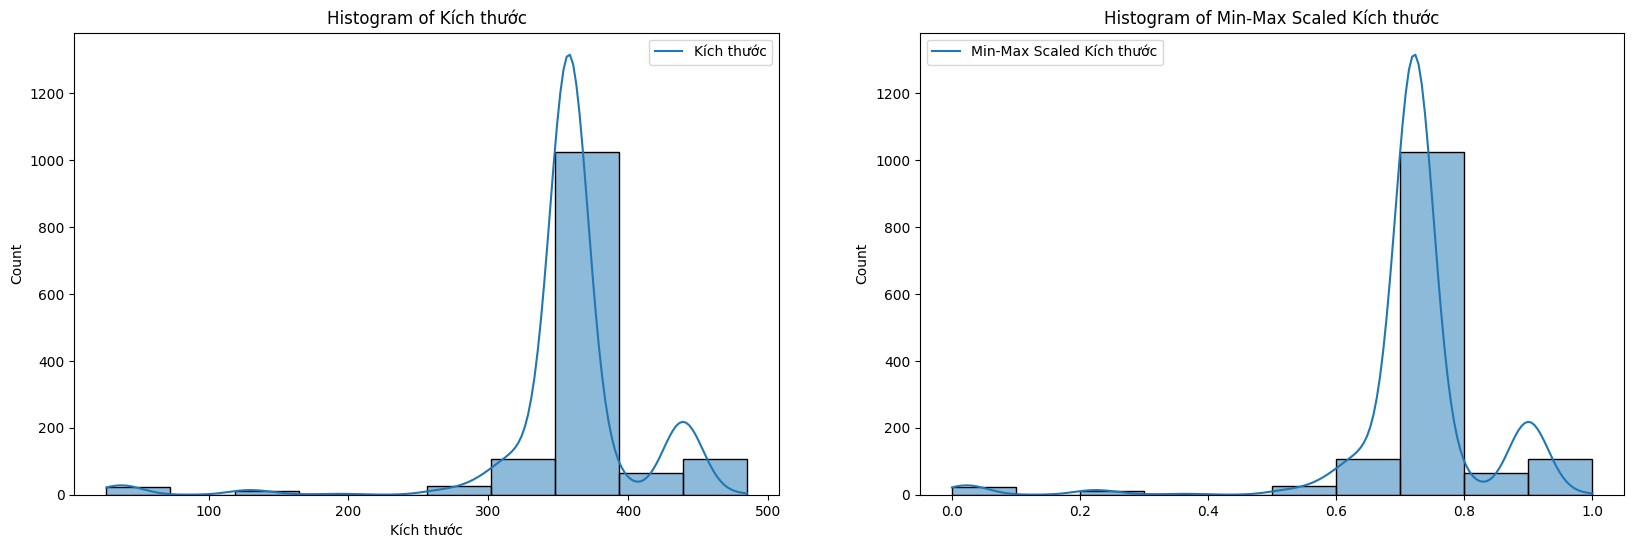

In [19]:

def _plot_dist(x, bins=10, varname='x'):
    sns.histplot(x, bins=bins, kde=True)
    plt.title('Histogram of {}'.format(varname))
    #plt.xlim(xlim)
    plt.legend([varname])

selected_column = 'Kích thước'
OG = df[selected_column]
X = df[selected_column].values.reshape(-1, 1)

# Min-Max Scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
df[selected_column] = X_minmax.flatten()

# Visualization
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1 = _plot_dist(OG, bins=10, varname=selected_column)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = _plot_dist(X_minmax, bins=10, varname='Min-Max Scaled ' + selected_column)

plt.show()



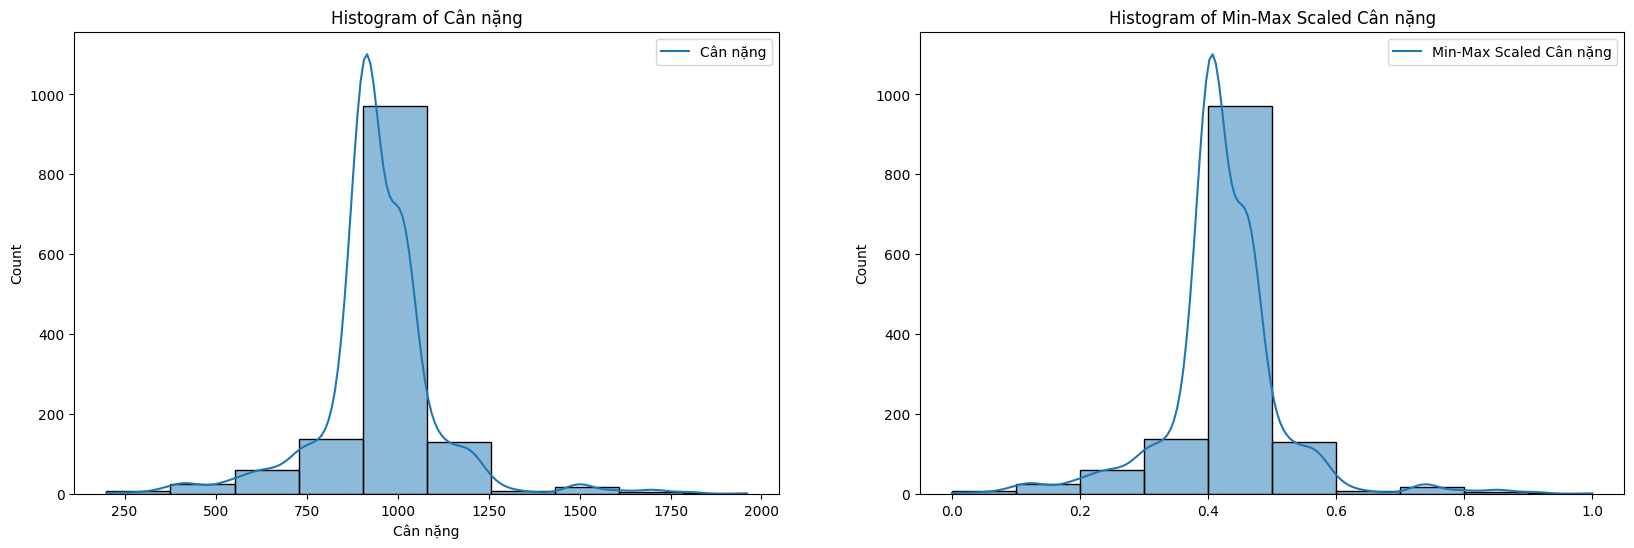

In [20]:

def _plot_dist(x, bins=10, varname='x'):
    sns.histplot(x, bins=bins, kde=True)
    plt.title('Histogram of {}'.format(varname))
    #plt.xlim(xlim)
    plt.legend([varname])

selected_column = 'Cân nặng'
OG = df[selected_column]
X = df[selected_column].values.reshape(-1, 1)

# Min-Max Scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
df[selected_column] = X_minmax.flatten()

# Visualization
fig = plt.figure(figsize=(20, 6))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1 = _plot_dist(OG, bins=10, varname=selected_column)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2 = _plot_dist(X_minmax, bins=10, varname='Min-Max Scaled ' + selected_column)

plt.show()



In [21]:
df.head()

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,0.719322,0.405072,2,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,0.719322,0.405072,2,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,0.652838,0.560227,2,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,0.652838,0.560227,2,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,0.652838,0.560227,2,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


In [22]:
df.to_csv('encoded_data.csv', index=False,encoding='utf-8-sig')